# Coffee Industry

## 1. Business Understanding

### Brazil as Top Leader of The Industry

Brazilian coffee is unique due to several factors that contribute to its distinctive characteristics:

- Diverse Growing Regions:\
Brazil is the largest coffee producer in the world, and its vast land offers diverse microclimates, altitudes, and soil types. Coffee is grown in various regions, each imparting unique flavor profiles to the beans. Key regions include Minas Gerais, São Paulo, Espírito Santo, Bahia, and Paraná, among others. The diversity in geography allows for a wide range of coffee flavors, from bright and fruity to nutty and chocolatey.

- Varieties of Coffee Beans:\
Brazil predominantly grows Arabica beans, known for their smooth, mild flavor and lower acidity, although Robusta beans are also cultivated. Within Arabica, there are different varieties like Bourbon, Catuai, and Mundo Novo, each offering distinct flavor notes and characteristics.

- Processing Methods:\
Brazil is renowned for its diverse coffee processing methods, particularly the natural (dry) process. In this method, coffee cherries are dried with the beans still inside, which allows the fruit's sugars to infuse into the beans, producing a sweet, full-bodied coffee with complex fruity notes. Brazil also uses pulped natural and washed processing methods, each contributing to different flavor profiles.

- Consistency and Volume:\
Brazilian coffee is known for its consistency in flavor and quality, thanks to the country's advanced agricultural practices and large-scale production. This consistency makes Brazilian coffee a popular choice for blends, providing a reliable base that enhances the flavors of other origins.

- Flavor Profile:\
Brazilian coffees are generally known for their balanced flavor with low acidity, medium body, and notes of chocolate, nuts, caramel, and sweet fruits. The flavor profile is often smooth and sweet, making it accessible and enjoyable for a wide range of coffee drinkers.

- Sustainability and Innovation:\
Brazil has a strong focus on sustainable coffee production, with many farms practicing environmentally friendly techniques and certifications such as Rainforest Alliance and Fair Trade. Additionally, Brazil is a leader in coffee research and innovation, constantly improving cultivation and processing methods to enhance quality and sustainability.

These factors combined make Brazilian coffee not only a staple in the global coffee industry but also a favorite among coffee enthusiasts for its versatility, consistency, and unique flavor profiles.

## 2. Data Mining

### Installs

In [75]:
# To extract tables from PDF files, using Pandas
# pip install pandas tabula-py
# tabula-py is a Python wrapper for Tabula

### Libraries

In [76]:
import numpy as np
import pandas as pd
import os

# Data Profile Reporting Tool
from ydata_profiling import ProfileReport
# To avoid unneeded warning display
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

import time
import datetime
import pycountry

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns

import pymysql
from sqlalchemy import create_engine, text

### Importing my Functions

In [77]:
# For File Processing and Data Cleaning
from coffee_functions import process_files, clean_and_prepare_dataframe

# For EDA Analysis

# For visualization purpose
from coffee_functions import process_trade_data
# Top Importers and Exporters
from coffee_functions import top_import_countries_per_year, top_export_countries_per_year
# To Calculate Production and Create Aggregations
from coffee_functions import calculate_grouped_coffee_data
# To include predefined graphs for each topic
from coffee_functions import plot_top_import_countries, plot_top_export_countries

### Load the Data

##### All Exports

##### Coffee Exports

In [78]:
brazil_trade_raw = process_files(r"source\datasets\UN_Comtrade_Exports_Coffee\1_Brazil", "ImportsExports_Coffee", (2017, 2023))
brazil_trade_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11953 entries, 0 to 11952
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TypeCode                  11953 non-null  object 
 1   FreqCode                  11953 non-null  object 
 2   RefPeriodId               11953 non-null  int64  
 3   RefYear                   11953 non-null  int64  
 4   RefMonth                  11953 non-null  int64  
 5   Period                    11953 non-null  int64  
 6   ReporterCode              11953 non-null  int64  
 7   ReporterISO               11953 non-null  object 
 8   ReporterDesc              11953 non-null  object 
 9   FlowCode                  11953 non-null  object 
 10  FlowDesc                  11953 non-null  object 
 11  PartnerCode               11953 non-null  int64  
 12  PartnerISO                11953 non-null  object 
 13  PartnerDesc               11953 non-null  object 
 14  Partne

In [79]:
brazil_trade_raw

,TypeCode,FreqCode,RefPeriodId,RefYear,RefMonth,Period,ReporterCode,ReporterISO,ReporterDesc,FlowCode,FlowDesc,PartnerCode,PartnerISO,PartnerDesc,Partner2Code,Partner2ISO,Partner2Desc,ClassificationCode,ClassificationSearchCode,IsOriginalClassification,CmdCode,CmdDesc,AggrLevel,IsLeaf,CustomsCode,CustomsDesc,MosCode,MotCode,MotDesc,QtyUnitCode,QtyUnitAbbr,Qty,IsQtyEstimated,AltQtyUnitCode,AltQtyUnitAbbr,AltQty,IsAltQtyEstimated,NetWgt,IsNetWgtEstimated,GrossWgt,IsGrossWgtEstimated,Cifvalue,Fobvalue,PrimaryValue,LegacyEstimationFlag,IsReported,IsAggregate,Unnamed: 47
0,C,M,20170101,2017,1,201701,76,BRA,Brazil,X,Export,8,ALB,Albania,0,W00,World,H5,HS,True,90111,Coffee; not roasted or decaffeinated,6,True,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,5.800000e+04,False,21,1000 KG,58,False,5.760000e+04,False,0,False,NaN,164736,164736,0,False,True,NaN
1,C,M,20170101,2017,1,201701,76,BRA,Brazil,X,Export,12,DZA,Algeria,0,W00,World,H5,HS,True,90111,Coffee; not roasted or decaffeinated,6,True,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,1.160000e+05,False,21,1000 KG,116,False,1.152000e+05,False,0,False,NaN,276446,276446,0,False,True,NaN
2,C,M,20170101,2017,1,201701,76,BRA,Brazil,X,Export,24,AGO,Angola,0,W00,World,H5,HS,True,90121,"Coffee; roasted, not decaffeinated",6,True,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,8.100000e+02,False,8,kg,810,False,8.100000e+02,False,0,False,NaN,7148,7148,0,False,True,NaN
3,C,M,20170101,2017,1,201701,76,BRA,Brazil,X,Export,32,ARG,Argentina,0,W00,World,H5,HS,True,90111,Coffee; not roasted or decaffeinated,6,True,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,1.240000e+06,False,21,1000 KG,1240,False,1.243018e+06,False,0,False,NaN,3625482,3625482,0,False,True,NaN
4,C,M,20170101,2017,1,201701,76,BRA,Brazil,X,Export,32,ARG,Argentina,0,W00,World,H5,HS,True,90121,"Coffee; roasted, not decaffeinated",6,True,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,2.732000e+04,False,8,kg,27320,False,2.732000e+04,False,0,False,NaN,222701,222701,0,False,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11948,C,M,20231201,2023,12,202312,76,BRA,Brazil,M,Import,0,W00,World,0,W00,World,H6,HS,True,90122,"Coffee; roasted, decaffeinated",6,True,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,7.955000e+03,False,8,kg,7955,False,7.955000e+03,False,0,False,185509.0,170377,185509,0,False,True,NaN
11949,C,M,20231201,2023,12,202312,76,BRA,Brazil,X,Export,0,W00,World,0,W00,World,H6,HS,True,90111,Coffee; not roasted or decaffeinated,6,True,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,4.383613e+08,False,-1,NaN,0,False,2.435601e+08,False,0,False,NaN,775531681,775531681,0,False,True,NaN
11950,C,M,20231201,2023,12,202312,76,BRA,Brazil,X,Export,0,W00,World,0,W00,World,H6,HS,True,90112,"Coffee; decaffeinated, not roasted",6,True,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,2.000000e+00,False,8,kg,2,False,2.000000e+00,False,0,False,NaN,96,96,0,False,True,NaN
11951,C,M,20231201,2023,12,202312,76,BRA,Brazil,X,Export,0,W00,World,0,W00,World,H6,HS,True,90121,"Coffee; roasted, not decaffeinated",6,True,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,3.887250e+05,False,8,kg,388725,False,3.887440e+05,False,0,False,NaN,3219766,3219766,0,False,True,NaN


In [80]:
brazil_trade_raw.shape

(11953, 48)

## 3. Data Cleaning

In [81]:
brazil_trade_clean = clean_and_prepare_dataframe(brazil_trade_raw)
brazil_trade_clean.shape

(11292, 13)

### Data Preprocessing for Trade Report Enhancement

To process the DataFrame containing trade data, let's make the dataset more readable for reporting purposes by renaming columns and mapping certain codes to more descriptive labels

In [82]:
# Apply the function to the current dataframe
brazil_trade = process_trade_data(brazil_trade_clean)
brazil_trade.shape

(11292, 14)

### Missing data (Null values)

In [83]:
# Checking for missing data
brazil_trade.isnull().sum().sort_values(ascending=False)

Year                   0
Month                  0
Period                 0
Origin_CountryISO      0
Origin_CountryName     0
FlowCode               0
Trade_Type             0
PartnerISO             0
Partner_CountryName    0
CmdCode                0
CmdDesc                0
Product_Type           0
Qty_in_kg              0
Trade_Amount           0
dtype: int64

### Finding Duplicates

In [84]:
# Find duplicates
brazil_trade.duplicated().sum()

0

### Exporting File as CSV

In [85]:
# Specify the folder where you want to save the file
folder_path = 'datasets'

# Construct the full file path
file_path = os.path.join(folder_path, 'brazil_trade.csv')

# Save DataFrame to a CSV file in the specified folder
brazil_trade.to_csv(file_path, index=False)

## Exploratory Data Analysis

### Initial Explorations

In [86]:
brazil_trade.head()

,Year,Month,Period,Origin_CountryISO,Origin_CountryName,FlowCode,Trade_Type,PartnerISO,Partner_CountryName,CmdCode,CmdDesc,Product_Type,Qty_in_kg,Trade_Amount
0,2017,1,201701,BRA,Brazil,X,Export,ALB,Albania,90111,Coffee; not roasted or decaffeinated,"Coffee, Green",58000.0,164736
1,2017,1,201701,BRA,Brazil,X,Export,DZA,Algeria,90111,Coffee; not roasted or decaffeinated,"Coffee, Green",116000.0,276446
2,2017,1,201701,BRA,Brazil,X,Export,AGO,Angola,90121,"Coffee; roasted, not decaffeinated","Coffee, Roasted",810.0,7148
3,2017,1,201701,BRA,Brazil,X,Export,ARG,Argentina,90111,Coffee; not roasted or decaffeinated,"Coffee, Green",1240000.0,3625482
4,2017,1,201701,BRA,Brazil,X,Export,ARG,Argentina,90121,"Coffee; roasted, not decaffeinated","Coffee, Roasted",27320.0,222701


In [87]:
# Displaying the data types of each column in the dataframe
brazil_trade.dtypes

Year                     int64
Month                    int64
Period                   int64
Origin_CountryISO       object
Origin_CountryName      object
FlowCode                object
Trade_Type              object
PartnerISO              object
Partner_CountryName     object
CmdCode                  int64
CmdDesc                 object
Product_Type            object
Qty_in_kg              float64
Trade_Amount             int64
dtype: object

In [88]:
# Retrieving the unique data types present in the dataframe columns
list(set(brazil_trade.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [89]:
# Extracting column names with numerical data types from the dataframe
brazil_trade.select_dtypes("number").columns

Index(['Year', 'Month', 'Period', 'CmdCode', 'Qty_in_kg', 'Trade_Amount'], dtype='object')

In [90]:
# Counting and sorting the unique values for each numerical column in descending order
brazil_trade.select_dtypes("number").nunique().sort_values(ascending=False)

Trade_Amount    9529
Qty_in_kg       6056
Period            84
Month             12
Year               7
CmdCode            4
dtype: int64

In [91]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
# Remember to adjust the threshold (in this case, < 20) based on your dataset's specific characteristics and domain knowledge.
potential_categorical_from_numerical = brazil_trade.select_dtypes("number").loc[:, brazil_trade.select_dtypes("number").nunique() < 90]
potential_categorical_from_numerical.head()

,Year,Month,Period,CmdCode
0,2017,1,201701,90111
1,2017,1,201701,90111
2,2017,1,201701,90121
3,2017,1,201701,90111
4,2017,1,201701,90121


In [92]:
# Retrieving column names with object (typically string) data types from the dataframe
brazil_trade.select_dtypes("object").columns

Index(['Origin_CountryISO', 'Origin_CountryName', 'FlowCode', 'Trade_Type',
       'PartnerISO', 'Partner_CountryName', 'CmdDesc', 'Product_Type'],
      dtype='object')

In [93]:
# Counting and sorting the unique values for each object (string) column in descending order
brazil_trade.select_dtypes("object").nunique().sort_values(ascending=False)

# All columns seem categorical, as there isn't a wide variability of values.

PartnerISO             148
Partner_CountryName    148
CmdDesc                  4
Product_Type             4
FlowCode                 2
Trade_Type               2
Origin_CountryISO        1
Origin_CountryName       1
dtype: int64

In [94]:
# Extracting columns with object (typically string) data types to create a categorical dataframe
# For demonstration purposes, let's consider the columns in potential_categorical_from_numerical as categorical variables.
brazil_trade_categorical = potential_categorical_from_numerical, pd.concat([brazil_trade.select_dtypes("object")], axis=1)

# Adjusting the numerical dataframe by removing the moved columns
brazil_trade_numerical = brazil_trade.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [95]:
# Verifying that the total number of columns in the dataframe is the sum of object (string) and numerical columns
len(brazil_trade.columns) == len(brazil_trade.select_dtypes("object").columns) + len(brazil_trade.select_dtypes("number").columns)

True

In [96]:
brazil_trade_categorical = brazil_trade[['Year', 'Month', 'Period', 'Origin_CountryISO', 'Origin_CountryName', 'FlowCode', 'Trade_Type', 'PartnerISO', 'Partner_CountryName', 'CmdCode', 'CmdDesc', 'Product_Type']]
brazil_trade_categorical.head(3)

,Year,Month,Period,Origin_CountryISO,Origin_CountryName,FlowCode,Trade_Type,PartnerISO,Partner_CountryName,CmdCode,CmdDesc,Product_Type
0,2017,1,201701,BRA,Brazil,X,Export,ALB,Albania,90111,Coffee; not roasted or decaffeinated,"Coffee, Green"
1,2017,1,201701,BRA,Brazil,X,Export,DZA,Algeria,90111,Coffee; not roasted or decaffeinated,"Coffee, Green"
2,2017,1,201701,BRA,Brazil,X,Export,AGO,Angola,90121,"Coffee; roasted, not decaffeinated","Coffee, Roasted"


In [97]:
brazil_trade_numerical.head(3)

,Qty_in_kg,Trade_Amount
0,58000.0,164736
1,116000.0,276446
2,810.0,7148


### Univariate Analysis

#### Categorical Variables

In [98]:
brazil_trade_categorical.head()

,Year,Month,Period,Origin_CountryISO,Origin_CountryName,FlowCode,Trade_Type,PartnerISO,Partner_CountryName,CmdCode,CmdDesc,Product_Type
0,2017,1,201701,BRA,Brazil,X,Export,ALB,Albania,90111,Coffee; not roasted or decaffeinated,"Coffee, Green"
1,2017,1,201701,BRA,Brazil,X,Export,DZA,Algeria,90111,Coffee; not roasted or decaffeinated,"Coffee, Green"
2,2017,1,201701,BRA,Brazil,X,Export,AGO,Angola,90121,"Coffee; roasted, not decaffeinated","Coffee, Roasted"
3,2017,1,201701,BRA,Brazil,X,Export,ARG,Argentina,90111,Coffee; not roasted or decaffeinated,"Coffee, Green"
4,2017,1,201701,BRA,Brazil,X,Export,ARG,Argentina,90121,"Coffee; roasted, not decaffeinated","Coffee, Roasted"


##### Trade_Type

In [99]:
# Frequency table for 'Trade_Type'
Trade_Type_freq_table = brazil_trade['Trade_Type'].value_counts()

# Calculating the proportion of each unique value in the 'Trade_Type'
Trade_Type_prop_table = brazil_trade['Trade_Type'].value_counts(normalize=True)

Trade_Type_freq_table, Trade_Type_prop_table

(Trade_Type
 Export    9928
 Import    1364
 Name: count, dtype: int64,
 Trade_Type
 Export    0.879207
 Import    0.120793
 Name: proportion, dtype: float64)

In [100]:
# Calculate the total number of exports
brazil_total_exports = brazil_trade[brazil_trade['Trade_Type'] == 'Export'].shape[0]

# Calculate the total number of imports
brazil_total_imports = brazil_trade[brazil_trade['Trade_Type'] == 'Import'].shape[0]

# Calculate Net Exports
brazil_net_exports = brazil_total_exports - brazil_total_imports

print("Total Exports: ", brazil_total_exports)
print("Total Imports: ", brazil_total_imports)
print("Net Exports: ", brazil_net_exports)

Total Exports:  9928
Total Imports:  1364
Net Exports:  8564


In [101]:
# Creating a crosstab table for the 'Trade_Type' column, counting occurrences for each unique value
Trade_Type_table = pd.crosstab(index = brazil_trade['Trade_Type'],  # Make a crosstab
                              columns="Transactions_Volume")      # Name the count column
Trade_Type_proportions = (Trade_Type_table / Trade_Type_table.sum()).round(3)
# Renaming the column for clarity
Trade_Type_proportions.columns = ['Trade_Proportion']

# Concatenate the two DataFrames
brazil_trade_type = pd.concat([Trade_Type_table, Trade_Type_proportions], axis=1)
brazil_trade_type

,Transactions_Volume,Trade_Proportion
Trade_Type,,
Export,9928,0.879
Import,1364,0.121


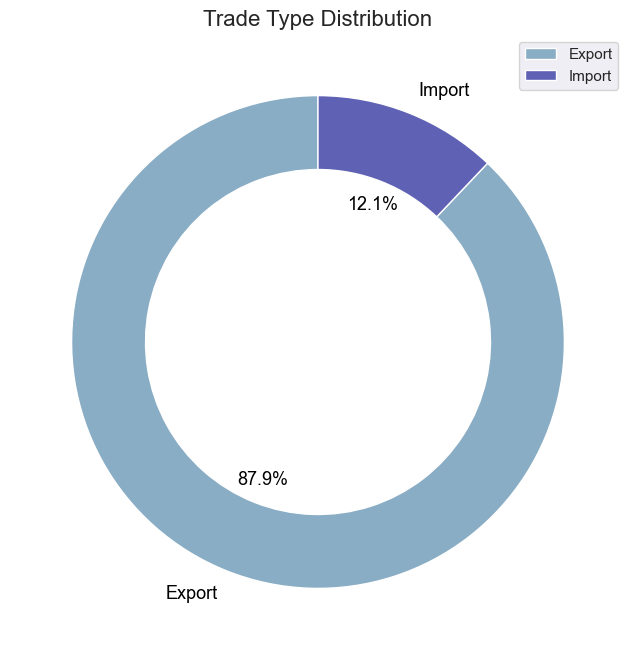

In [102]:
plt.figure(figsize=(8, 8))
brazil_trade['Trade_Type'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("twilight"),
    textprops={'fontsize': 13, 'color': 'black'},
    wedgeprops={'width': 0.3}
)
plt.title('Trade Type Distribution', fontsize=16)
plt.ylabel('')  # Remove the default label
plt.legend(labels=brazil_trade['Trade_Type'].unique(), loc="best", fontsize=11)
plt.show()

**Insights for 'Trade_Type'**:\
Brazil primarily exports coffee, accounting for nearly 87.9% of its total trading volume. The remaining 12.1% consists of imports, resulting in a net export surplus of 8,564 transactions.

##### Product_Type

In [103]:
# Frequency table for 'Product_Type'
Product_Type_freq_table = brazil_trade['Product_Type'].value_counts()

# Calculating the proportion of each unique value in the 'Trade_Type'
Product_Type_prop_table = brazil_trade['Product_Type'].value_counts(normalize=True)

Product_Type_freq_table, Product_Type_prop_table

(Product_Type
 Coffee, Green            6101
 Coffee, Roasted          4070
 Coffee, Roasted Decaf    1020
 Coffee, Green Decaf       101
 Name: count, dtype: int64,
 Product_Type
 Coffee, Green            0.540294
 Coffee, Roasted          0.360432
 Coffee, Roasted Decaf    0.090329
 Coffee, Green Decaf      0.008944
 Name: proportion, dtype: float64)

In [104]:
# Creating a crosstab table for the 'Product_Type' column, counting occurrences for each unique value
Product_Type_table = pd.crosstab(index = brazil_trade['Product_Type'],  # Make a crosstab
                              columns="Transactions_Volume")      # Name the count column
Product_Type_proportions = (Product_Type_table / Product_Type_table.sum()).round(3)
# Renaming the column for clarity
Product_Type_proportions.columns = ['Product_Type_Proportion']

# Concatenate the two DataFrames
brazil_Product_Type = pd.concat([Product_Type_table, Product_Type_proportions], axis=1)
brazil_Product_Type

,Transactions_Volume,Product_Type_Proportion
Product_Type,,
"Coffee, Green",6101,0.540
"Coffee, Green Decaf",101,0.009
"Coffee, Roasted",4070,0.360
"Coffee, Roasted Decaf",1020,0.090


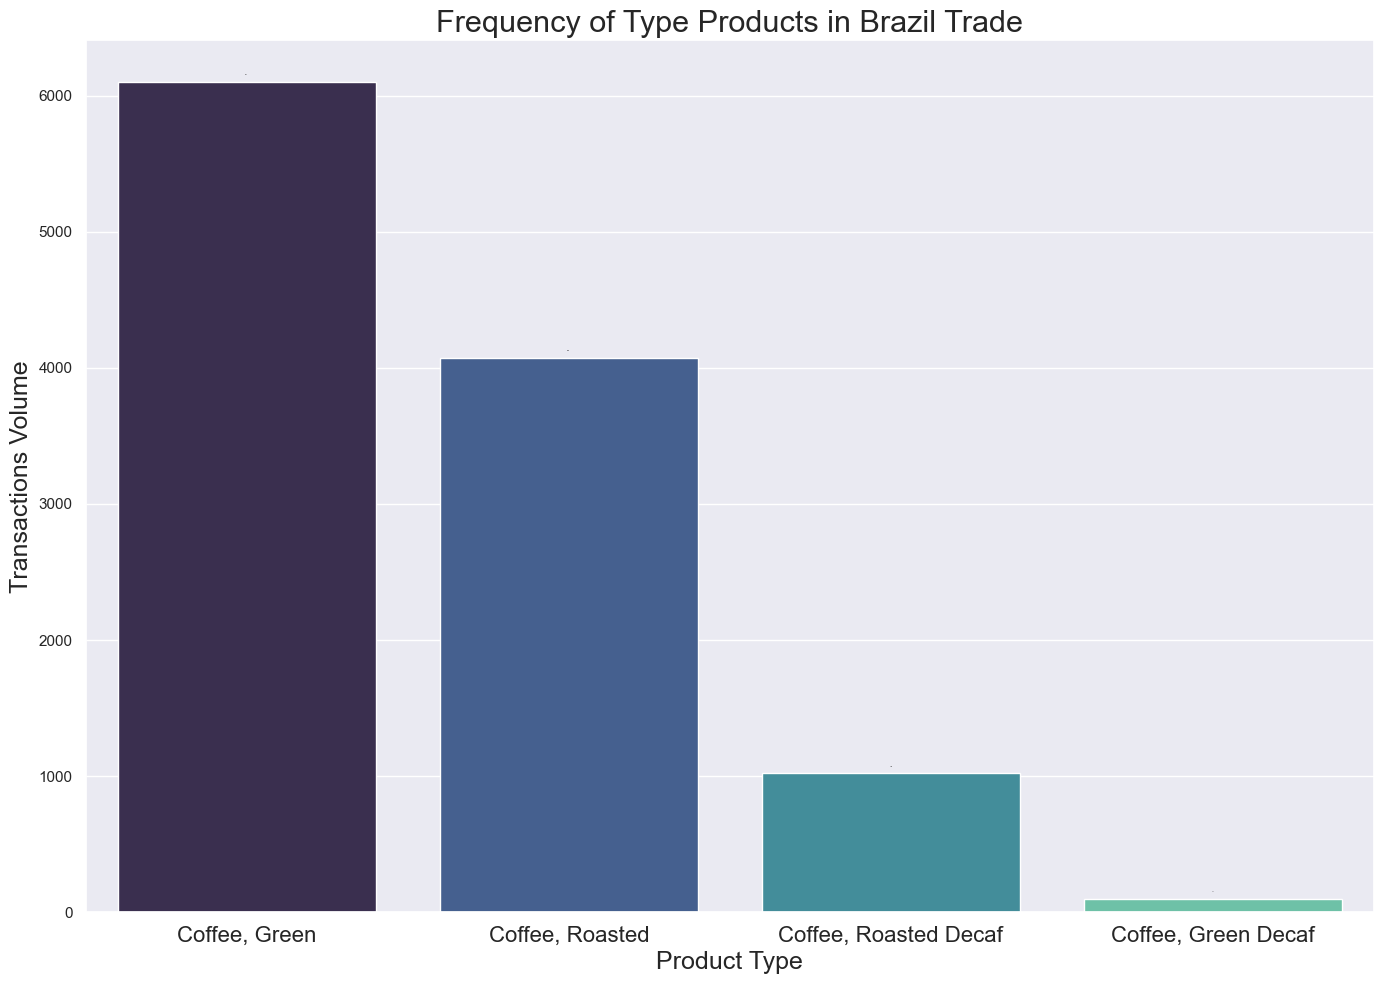

In [105]:
# Plotting a bar chart using the values from the frequency table
# Sort the DataFrame by 'Transactions_Volume' to ensure the highest volume is on top
brazil_Product_Type_sorted = brazil_Product_Type.sort_values(by='Transactions_Volume', ascending=False)

# Set the plot size for better readability
plt.figure(figsize=(14, 10))

# Create the barplot using seaborn
sns.barplot(
    x=brazil_Product_Type_sorted.index,
    y=brazil_Product_Type_sorted['Transactions_Volume'],
    palette='mako'
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center', fontsize=16)

# Add labels and title
plt.xlabel('Product Type', fontsize=18)
plt.ylabel('Transactions Volume', fontsize=18)
plt.title('Frequency of Type Products in Brazil Trade', fontsize=22)

# Add data labels on top of the bars
for index, value in enumerate(brazil_Product_Type_sorted['Transactions_Volume']):
    plt.text(index, value + 50, str(value), ha='center', fontsize=1)

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

**Insights for 'Product_Type'**:\
- In Brazil, Green Coffee is by far the most traded product type in Brazil, with 6,101 transactions. This indicates that raw (unroasted) coffee beans are the primary export product in Brazil's coffee trade.

- Although, Roasted Coffee is the second most traded product type, with 4,070 transactions, it still represents a significant portion of Brazil's coffee trade.

- Limited Decaffeinated Coffee Trade, whether roasted or green, is a much smaller segment of Brazil's coffee trade market.

- This picture suggest that Brazil focus on exporting raw materials, rather than processed goods. This could imply a reliance on international markets to roast and package the coffee.

- Potential niche market in decaf coffee, this could be explored further, particularly if demand for decaf coffee grows in the future.

#### Numerical Variables

In [106]:
brazil_trade_numerical.head(3)

,Qty_in_kg,Trade_Amount
0,58000.0,164736
1,116000.0,276446
2,810.0,7148


In [107]:
# Summary statistics for the dataset
brazil_trade_numerical.describe()

,Qty_in_kg,Trade_Amount
count,1.129200e+04,1.129200e+04
mean,1.543349e+07,3.604851e+06
std,1.567185e+08,1.290571e+07
min,0.000000e+00,1.000000e+00
25%,3.000000e+02,2.705250e+03
50%,2.628450e+04,1.408720e+05
75%,5.960500e+05,1.423825e+06
max,6.509320e+09,1.887591e+08


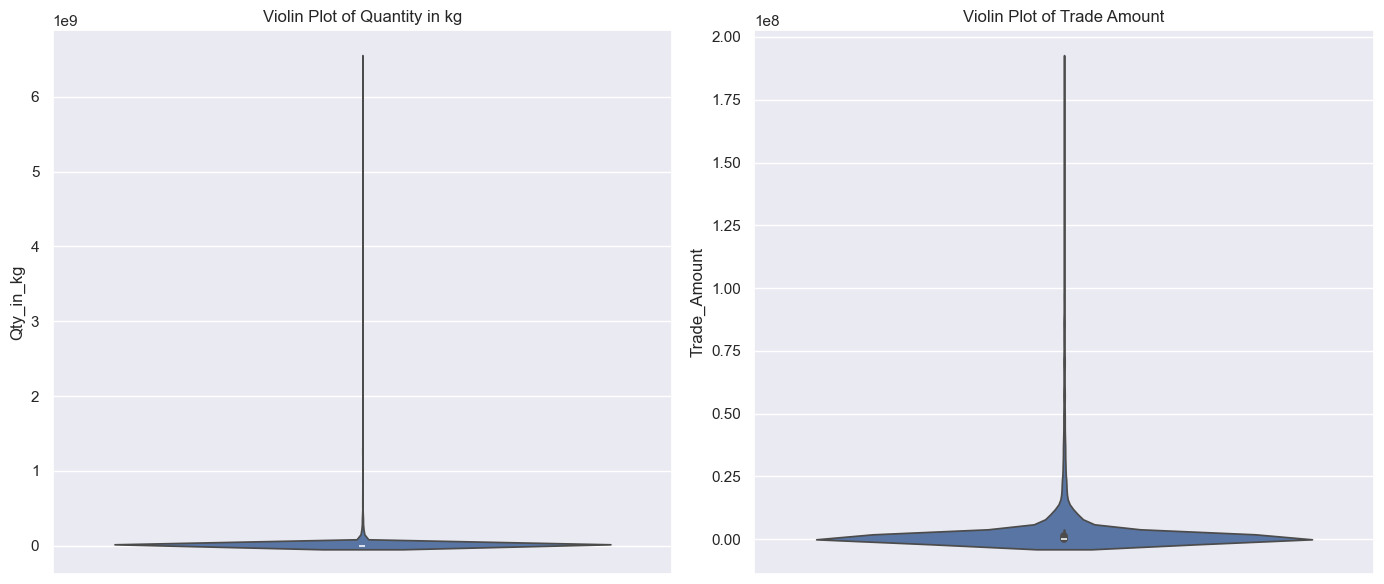

In [108]:
plt.figure(figsize=(14, 6))

# Create a violin plot for each column
plt.subplot(1, 2, 1)
sns.violinplot(y=brazil_trade_numerical['Qty_in_kg'])
plt.title('Violin Plot of Quantity in kg')

plt.subplot(1, 2, 2)
sns.violinplot(y=brazil_trade_numerical['Trade_Amount'])
plt.title('Violin Plot of Trade Amount')

plt.tight_layout()
plt.show()

- Prevalence of Small Transactions: Most coffee trades in Brazil involve small quantities and low trade amounts, indicating a market dominated by frequent, small-scale transactions.

- Significant High-Value Outliers: A few large-scale coffee trades stand out as outliers, likely representing key exports that contribute disproportionately to the overall market value.

- Consistent Trade Patterns: The typical coffee trade in Brazil is fairly consistent, with low variation in transaction size, reflecting a stable market for most participants.

- Two-Tier Market Structure: The market is characterized by a mix of numerous small transactions and a few high-impact trades, suggesting distinct segments within the coffee trade ecosystem.

### Bivariate Analysis

#### Top 10 Exporter Countries per Year

In [109]:
top_exports_brazil = top_export_countries_per_year(brazil_trade)
top_exports_brazil.head(10)

,Year,Partner_CountryName,Product_Type,Qty_in_kg,Trade_Amount
58,2017,Italy,"Coffee, Green",1.079246e+10,490626197
123,2017,United States,"Coffee, Green",9.141230e+09,916702135
60,2017,Japan,"Coffee, Green",7.843237e+09,323387345
43,2017,Germany,"Coffee, Green",4.774687e+09,878997341
10,2017,Belgium,"Coffee, Green",2.542575e+09,304901088
302,2018,United States,"Coffee, Green",2.747300e+10,772095884
192,2018,Germany,"Coffee, Green",2.178102e+10,749377543
151,2018,Belgium,"Coffee, Green",1.177526e+10,303941760
211,2018,Italy,"Coffee, Green",7.550668e+09,461567060
214,2018,Japan,"Coffee, Green",6.655878e+09,323015265


In [110]:
top_exports_brazil.max()

Year                            2023
Partner_CountryName    United States
Product_Type           Coffee, Green
Qty_in_kg              27473003862.0
Trade_Amount              1713113879
dtype: object

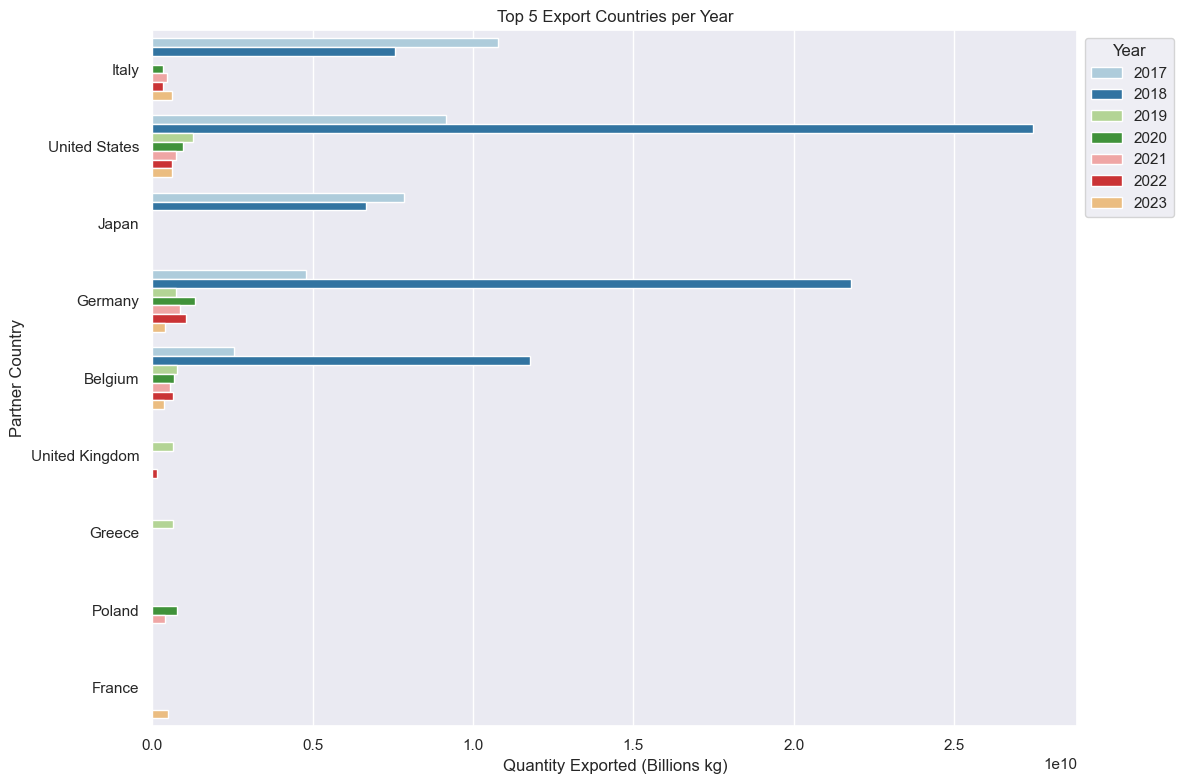

In [111]:
plot_top_export_countries(top_exports_brazil)

**Insights for Top Exports**:

- Top Markets:
Italy and the United States are the largest importers of Brazilian coffee in 2017, with Italy importing 10.79 billion kg and the U.S. importing 9.14 billion kg. The U.S. market, however, generates a higher trade value ($916.70 million), indicating a higher price per kilogram.

- High-Value Markets:
Germany and the United States offer significant economic returns, with Germany importing 4.77 billion kg valued at $878.99 million. These markets are crucial for Brazil's export revenue.
Emerging and Diverse Markets:

- Korea and Russia are notable non-European markets, with Korea importing 1.95 billion kg and Russia 1.39 billion kg. Europe remains a diversified market with substantial imports from Belgium, France, and Spain.

- Market Price Variations:
There’s a significant variation in trade value per kilogram across countries, with the U.S. and Germany paying higher premiums compared to others like Italy and Russia, reflecting different market dynamics.

#### Top 10 Import Countries per Year

To identify the top 10 countries from which a given country (in this case, Brazil) imports specific products each year.

In [112]:
top_imports_brazil = top_import_countries_per_year(brazil_trade)
top_imports_brazil.head()

,Year,Partner_CountryName,Product_Type,Qty_in_kg,Trade_Amount
18,2017,Switzerland,"Coffee, Roasted",1642549.0,47858374
23,2017,Uruguay,"Coffee, Green",917000.0,16138
9,2017,Italy,"Coffee, Roasted",604720.0,8189331
26,2017,Viet Nam,"Coffee, Green",351000.0,783822
7,2017,France,"Coffee, Roasted",270823.0,5340125


In [113]:
top_imports_brazil.max()

Year                              2023
Partner_CountryName           Viet Nam
Product_Type           Coffee, Roasted
Qty_in_kg                    5069000.0
Trade_Amount                  71691300
dtype: object

##### Total Quantity Imported by Product per Year

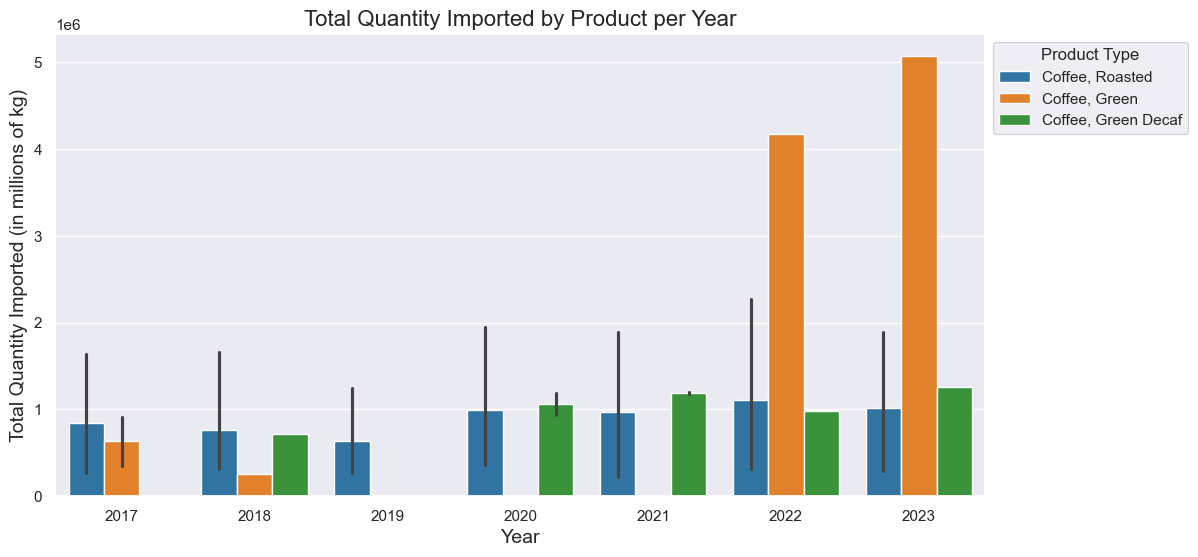

In [121]:
# Set the visual style
sns.set_theme()

# Create a barplot to show total quantity imported by year and product type
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Year', 
    y='Qty_in_kg', 
    hue='Product_Type', 
    data=top_imports_brazil, 
    palette='tab10'
)

# Add titles and labels
plt.title('Total Quantity Imported by Product per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Quantity Imported (in millions of kg)', fontsize=14)
plt.legend(title='Product Type', bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()

**Insights for Quantity Imported by Product per Year**:

Brazil's import quantities have remained relatively stable over the years, with lower volumes in most coffee categories. However, there has been a dramatic focus on raw coffee beans in recent years, possibly due to changing market dynamics or external factors affecting Brazil's coffee trade. The graph reveals a significant spike in imports of 'Coffee, Green (Not Roasted/Decaf)' in 2022 and 2023, indicating a sharp increase in demand or a strategic shift in Brazil's coffee imports.

##### Top 5 Partner Countries for Imports per Year

In [115]:
# Get the Top 5 Partner Countries by Import Quantity for Each Year
top_5_imports = (top_imports_brazil.groupby('Year', group_keys=False)
                 .apply(lambda x: x.nlargest(5, 'Qty_in_kg')))
top_5_imports

,Year,Partner_CountryName,Product_Type,Qty_in_kg,Trade_Amount
18,2017,Switzerland,"Coffee, Roasted",1642549.0,47858374
23,2017,Uruguay,"Coffee, Green",917000.0,16138
9,2017,Italy,"Coffee, Roasted",604720.0,8189331
26,2017,Viet Nam,"Coffee, Green",351000.0,783822
7,2017,France,"Coffee, Roasted",270823.0,5340125
46,2018,Switzerland,"Coffee, Roasted",1656586.0,36100628
36,2018,Germany,"Coffee, Green Decaf",712546.0,1566657
35,2018,France,"Coffee, Roasted",321654.0,5154497
38,2018,Italy,"Coffee, Roasted",311929.0,5108975
28,2018,Brazil,"Coffee, Green",260124.0,7691


In [116]:
top_5_imports.max()

Year                              2023
Partner_CountryName           Viet Nam
Product_Type           Coffee, Roasted
Qty_in_kg                    5069000.0
Trade_Amount                  71691300
dtype: object

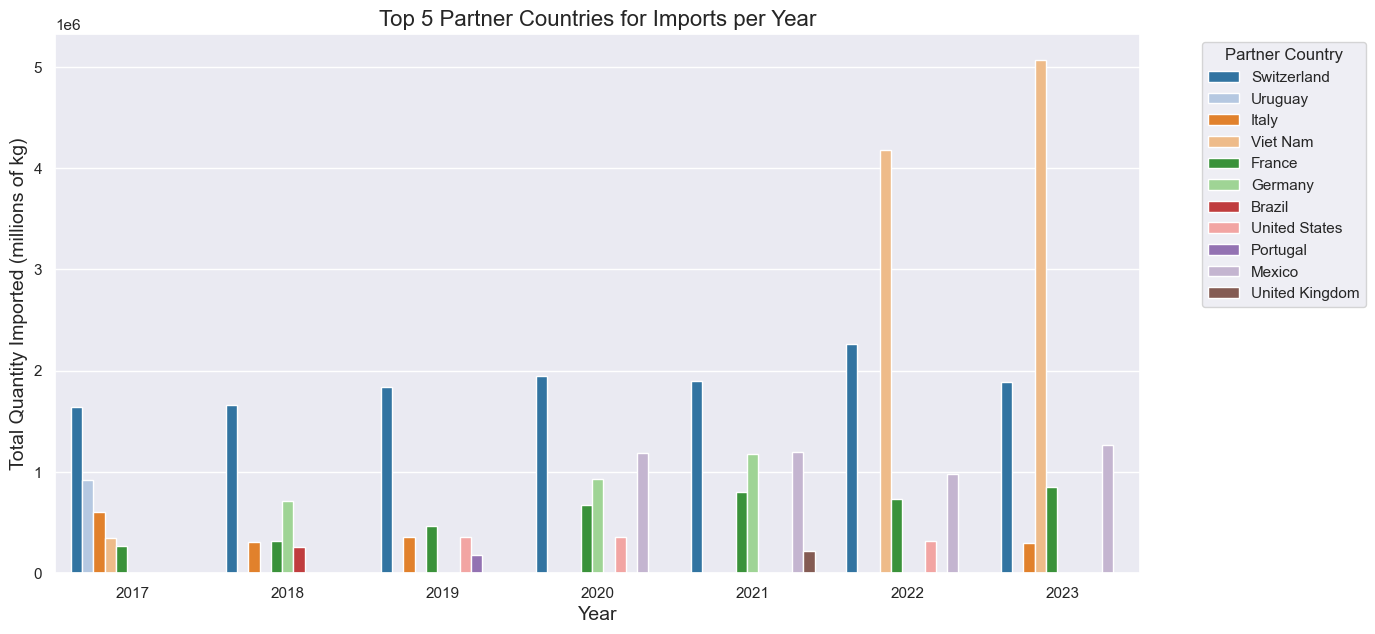

In [117]:
# Set the visual style
sns.set_theme()

# Create the Bar Plot
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    x='Year', 
    y='Qty_in_kg', 
    hue='Partner_CountryName', 
    data=top_5_imports, 
    palette='tab20'
)

# Add Titles and Labels
plt.title('Top 5 Partner Countries for Imports per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Quantity Imported (millions of kg)', fontsize=14)
plt.legend(title='Partner Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the Plot
plt.show()

**Insights for Quantity Imported by Product per Year**:

The data suggests that Vietnam, Switzerland, and Mexico are increasingly important markets for Brazilian coffee, particularly for specific product types like green and decaf coffee. These trends highlight potential areas for market expansion and strategic focus.

1. Dominance of Switzerland: 
Switzerland consistently ranks as the top importer of Brazilian coffee, particularly roasted coffee. The quantity imported by Switzerland steadily increases from 1.64 million kg in 2017 to 1.89 million kg in 2023, with a corresponding trade value reaching $58.9 million in 2023. This highlights Switzerland as a stable and growing market for Brazilian coffee.

2. Vietnam’s Rapid Growth:
Vietnam shows a sharp increase in imports, particularly of green coffee, from 351,000 kg in 2017 to 5.07 million kg in 2023. The trade value also grows significantly, reflecting Vietnam's emerging role as a key importer of Brazilian coffee, possibly due to increased domestic consumption or processing for re-export.

3. Mexico and Germany as Key Decaf Markets:
Both Mexico and Germany consistently appear as top importers of green decaf coffee. Mexico's imports grew from 931,835 kg in 2020 to 1.26 million kg in 2023, while Germany maintained similar levels. This indicates strong demand for decaffeinated coffee in these markets, possibly driven by consumer preferences.

4. France and Italy’s Stable Import Patterns:
France and Italy are steady importers of roasted coffee. France’s imports increased from 270,823 kg in 2017 to 850,539 kg in 2023, while Italy’s imports show some fluctuations. Despite these variations, both countries remain important markets for Brazilian roasted coffee.

5. United States as a Variable Importer:
The United States appears as a significant importer of roasted coffee in some years, but its import quantities and values are more variable compared to other countries. This variability might reflect changing market dynamics, consumer preferences, or economic conditions in the U.S.

#### Aggregate Coffee Trade Data by Year, Trade Type, and Product Type

In [118]:
brazil_coffee_market = calculate_grouped_coffee_data(brazil_trade)
brazil_coffee_market

,Year,Trade_Type,Product_Type,Qty_in_kg,Trade_Amount
0,2017,Export,"Coffee, Green",4.974376e+10,4585600585
1,2017,Export,"Coffee, Roasted",1.766001e+06,13087176
2,2017,Export,"Coffee, Roasted Decaf",1.053300e+04,78710
3,2017,Import,"Coffee, Green",1.451312e+06,809185
4,2017,Import,"Coffee, Roasted",3.295096e+06,70863680
5,2017,Import,"Coffee, Roasted Decaf",1.920832e+05,4283825
6,2018,Export,"Coffee, Green",9.464338e+10,4344737740
7,2018,Export,"Coffee, Green Decaf",2.115000e+03,14114
8,2018,Export,"Coffee, Roasted",1.753279e+06,11564668
9,2018,Export,"Coffee, Roasted Decaf",1.383100e+04,99022


In [119]:
brazil_coffee_market['Qty_in_kg'].max()

94643383552.932

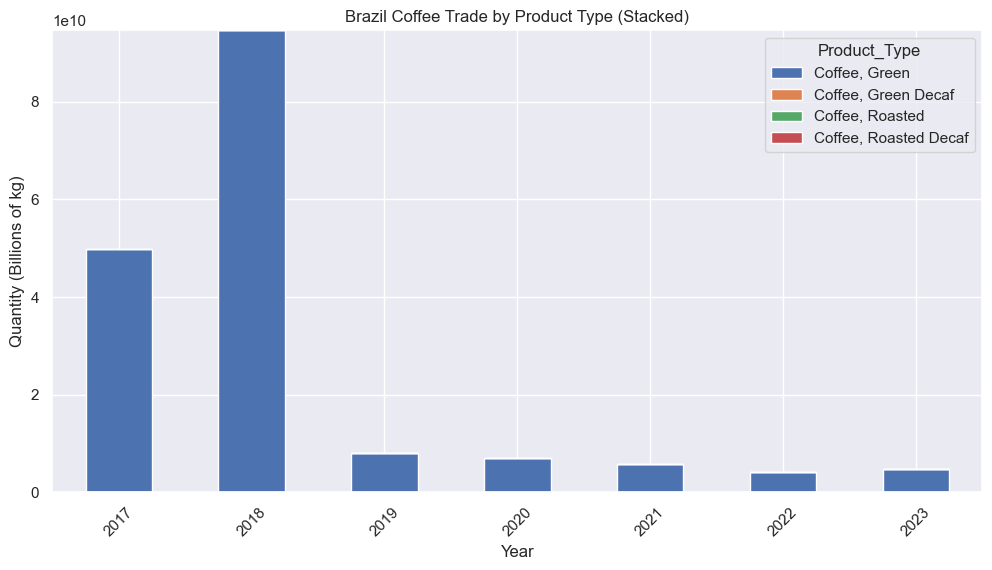

In [120]:
brazil_coffee_market_pivot = brazil_coffee_market.pivot_table(index='Year', columns='Product_Type', values='Qty_in_kg', aggfunc='sum')
brazil_coffee_market_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Brazil Coffee Trade by Product Type (Stacked)')
plt.xlabel('Year')
plt.ylabel('Quantity (Billions of kg)')
plt.xticks(rotation=45)
plt.show()

**Insights for Brazil Coffee Trade Dynamic by Product Type per Year**:

1. Dominance of Green Coffee Exports:
Green Coffee (unroasted coffee beans) overwhelmingly dominates Brazil's coffee trade, particularly in 2017 and 2018. These years saw significantly higher volumes of green coffee exports compared to other types. In 2018, Brazil exported over 94 billion kg of green coffee, almost double the volume exported in 2017. This suggests that 2018 was a peak year for green coffee exports.

2. Decline in Green Coffee Exports After 2018:
There is a noticeable decline in the quantity of green coffee exports. From 2019 onwards, the export volumes are much lower, and by 2023, the volumes have decreased significantly. This could indicate changes in global demand, production issues, or a shift in trade policies.

3. Other Coffee Types Remain Minor:
"Coffee, Roasted," "Coffee, Green Decaf," and "Coffee, Roasted Decaf," are present in much smaller volumes compared to green coffee. This trend remains consistent throughout the years shown. Brazil's role as a major exporter of raw coffee beans rather than processed coffee.

4. Stability in Import Volumes:
The plot also indicates relatively stable and minor volumes of coffee imports, particularly for "Coffee, Green Decaf" and "Coffee, Roasted." These imports do not show significant fluctuations and remain small compared to export volumes, suggesting that Brazil largely relies on domestic production for its coffee needs.